# Importing the Libraries

In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [3]:
hotel_booking_df = pd.read_csv('hotel_booking.csv')

# Exploratory Data Analysis and Data Cleaning

In [4]:
 # Let's take a look at our dataset, for that we called top 5 values from our dataset
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [5]:
# Also, let's take a look at the shape. Over here we have '119390' Rows and '32' Columns.
hotel_booking_df.shape

(119390, 32)

In [6]:
hotel_booking_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
hotel_booking_df['is_canceled'].head(20) 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: is_canceled, dtype: int64

In [7]:
# We need 'reservation_status_date' column, but since it has object data type, we need to convert it into 'datetime64' datatype.
hotel_booking_df['reservation_status_date'] = pd.to_datetime(hotel_booking_df['reservation_status_date'])

In [55]:
# And we can see that the datatype of 'reservation_status_date' column has been converted to 'datetime64'
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [10]:
# This gives us all the numerical attributes of our int/float columns.
hotel_booking_df.describe()

# If we carefully watch the 'adr' column we have minimum value as '-6' and maximum value as '5400' and these two are outliers 
# for us, and we need to take out those outliers.

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

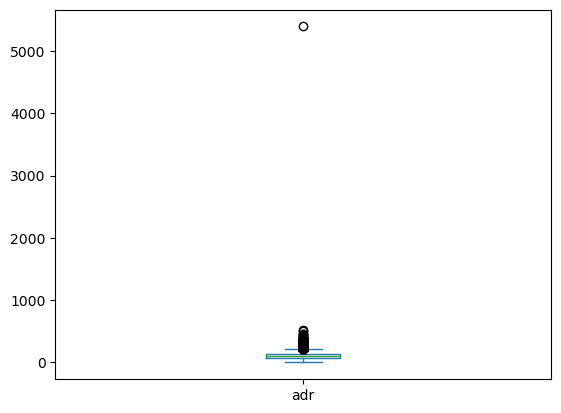

In [11]:
hotel_booking_df['adr'].plot(kind = 'box')
# As we can watch almost all values are under '1000' range and only one value is above '5000', thus it becomes an outlier and 
# we need to get rid of it.

In [4]:
hotel_booking_df[hotel_booking_df['adr'] < 5000]['adr'] # We passed a condition that only values less than '5000' must be included

# And now we will pass these values into our 'adr' column as updated values.
hotel_booking_df = hotel_booking_df[hotel_booking_df['adr'] < 5000]

In [13]:
# And since 'adr' will play an important part in our data analysis, tackling it was important.

In [14]:
# We specifically called the the decribe using 'include = object' which gave us the attributes for our 'object' datatype functions.
hotel_booking_df.describe(include = object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119389,119389,119389,118901,119389,119389,119389,119389,119389,119389,119389
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79329,13877,92309,48589,56477,97869,85993,74052,104641,89612,75166


In [74]:
# We ran 'for' loop on our above cell code, which returned us the 'columns', 'Unique values' and we printed them
for col in hotel_booking_df.describe(include = object).columns:
    print(col)
    print(hotel_booking_df[col].unique())
    print('-'*75)

hotel
['Resort Hotel' 'City Hotel']
---------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
---------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
---------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 

In [5]:
# This will return us the columns with the total number of those columns NULL values.
hotel_booking_df.isnull().sum()

# And as we can see that the 'company' column has a lot of NULL values around '112593' so we will drop this column as it will be
# a messy situation to perform data analysis for us, and also we don't want it to affect our data.

hotel_booking_df.drop(['company', 'agent'], axis = 1, inplace = True)

In [6]:
# Now we will check for NULL values again
hotel_booking_df.isnull().sum()

# As you can see both of those columns are dropped.

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

# Analyzing and Visualizing our Data

In [18]:
# Let's calculate the percentage of 'cancelled' and 'not_cancelled' values

hotel_booking_df['is_canceled'].value_counts() # These are the total count of values which are 'cancelled' and 'not_cancelled'

0    75166
1    44223
Name: is_canceled, dtype: int64

In [19]:
# To get the percentage, we have to add (normalize = True) in our above line of code
cancelled_percent = hotel_booking_df['is_canceled'].value_counts(normalize = True)*100 
cancelled_percent
# As you can see their are total '62.9588 %' values which are 'not_cancelled' and around '37.0411 %' are cancelled, which is a 
# huge amount, now we need to further dive deep and try to get to the core.

0    62.958899
1    37.041101
Name: is_canceled, dtype: float64

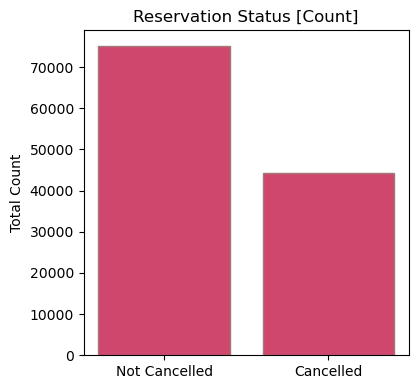

In [43]:
# Let's plot a Bar Graph which shows us the total count of 'Cancelled' and 'Not_cancelled' values. 

fig = plt.figure(figsize = (10,10))

axes = fig.add_axes(rect = [0,0,0.325,0.325])

axes.set_title('Reservation Status [Count]')
axes.set_ylabel('Total Count')

plt.bar(['Not Cancelled', 'Cancelled'], hotel_booking_df['is_canceled'].value_counts(), color = '#D0476E', edgecolor = '#A17A79' )
plt.show()

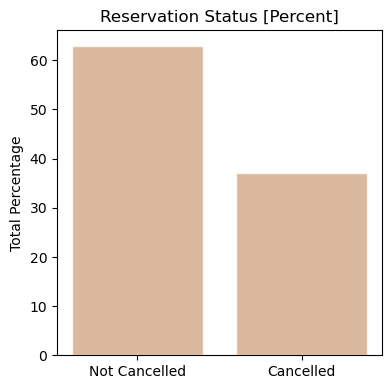

In [41]:
# Second plot show the percentage of 'Cancelled' and 'Not_cancelled' values. 
fig = plt.figure(figsize = (10,10))

axes = fig.add_axes(rect = [0,0,0.325,0.325])

axes.set_title('Reservation Status [Percent]')
axes.set_ylabel('Total Percentage')

plt.bar(['Not Cancelled', 'Cancelled'], hotel_booking_df['is_canceled'].value_counts(normalize = True)*100, color = '#DAB89D', edgecolor = '#FAF6EF' )
plt.show()

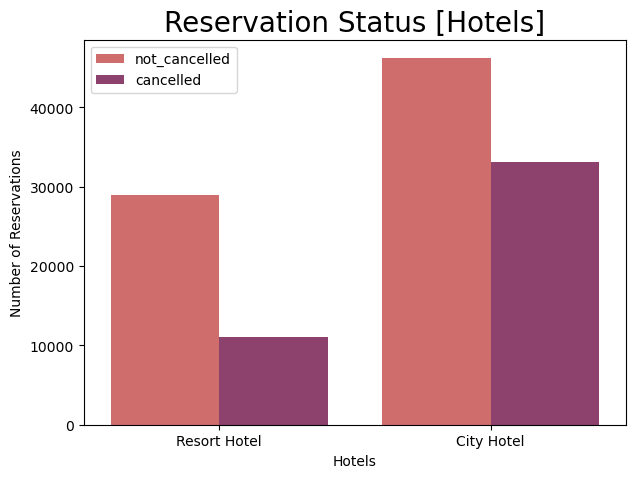

In [25]:
# Let's also see the 'cancellation Count' according to the hotel types. We can use 'Count plot' for the same.
plt.figure(figsize = (7,5))
 
axes = sns.countplot(x = 'hotel', hue = 'is_canceled', data = hotel_booking_df, palette = 'flare')
legend_labels = axes.get_legend_handles_labels()                     
plt.title('Reservation Status [Hotels]', size = 20)
plt.xlabel('Hotels')
plt.ylabel('Number of Reservations')  
plt.legend(['not_cancelled', 'cancelled'])
plt.show()

In [68]:
# Now let's check the number of reservations cancelled per month, for that let's create a new column called month.

hotel_booking_df['month'] = hotel_booking_df['reservation_status_date'].dt.month
hotel_booking_df['month']

0         1
1         1
2         2
3         2
4         3
         ..
119385    6
119386    7
119387    7
119388    7
119389    7
Name: month, Length: 119389, dtype: int64

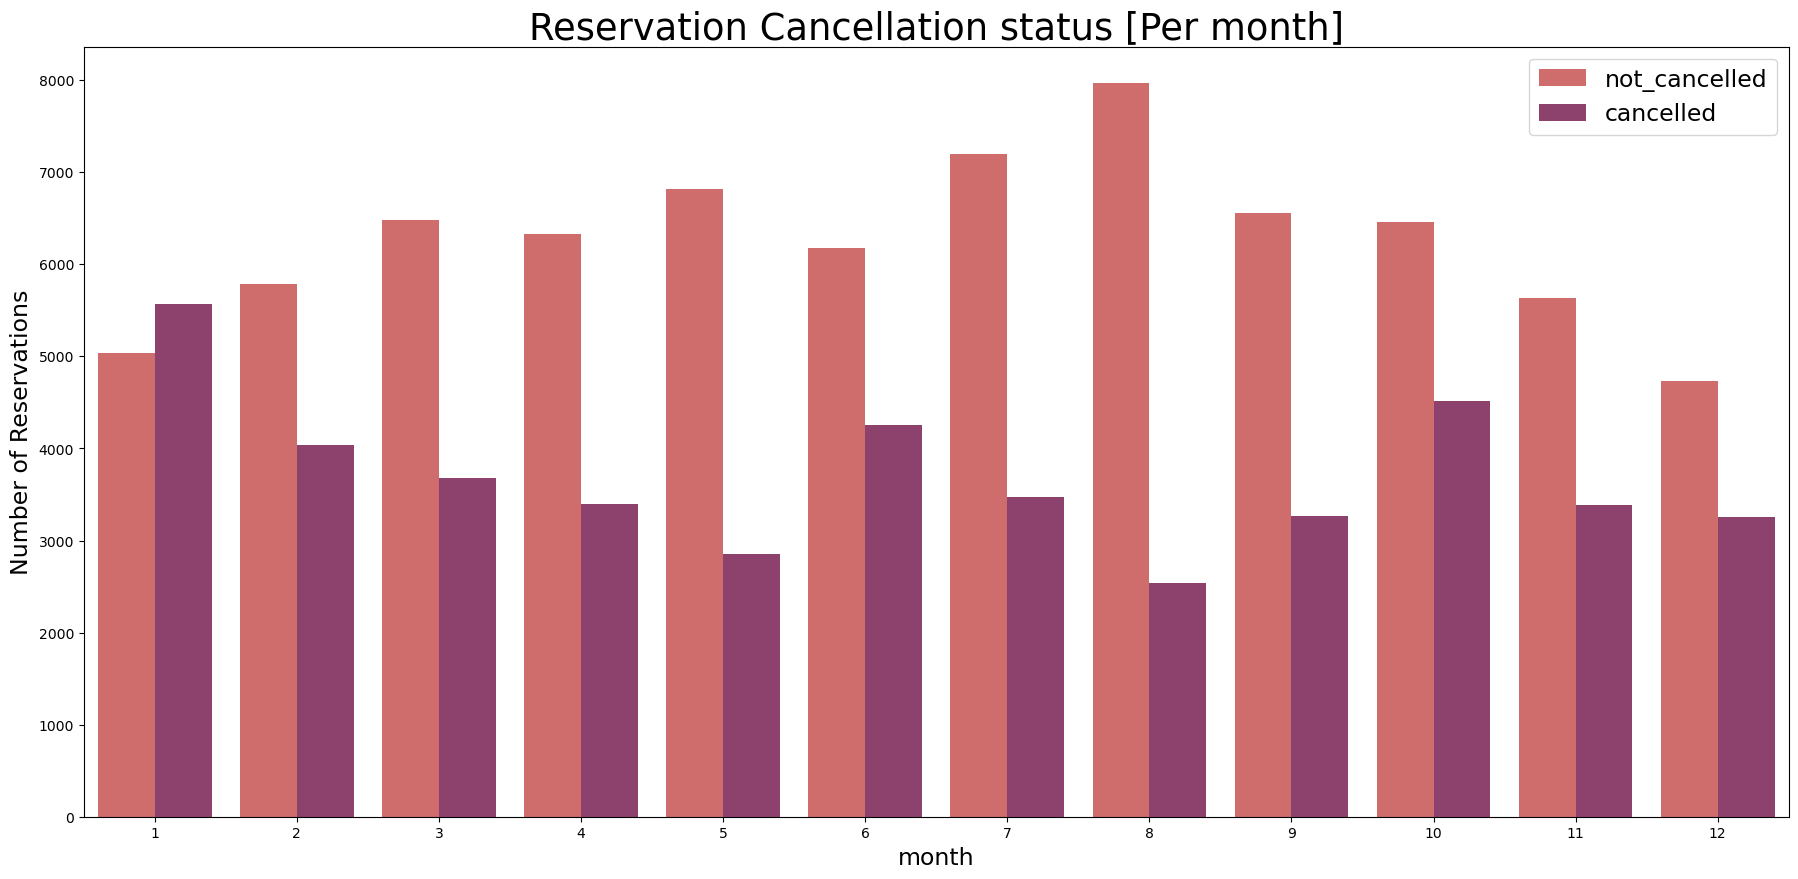

In [89]:
# Now let's plot a count plot which shows cancellation per month throught the year

plt.figure(figsize = (22,10))
 
axes = sns.countplot(x = 'month', hue = 'is_canceled', data = hotel_booking_df, palette = 'flare')
legend_labels = axes.get_legend_handles_labels()                     
plt.title('Reservation Cancellation status [Per month]', fontsize = 26.5)
plt.xlabel('month', fontsize = 17)
plt.ylabel('Number of Reservations', fontsize = 17)  
plt.legend(['not_cancelled', 'cancelled'], fontsize = 17)
plt.show()

In [ ]:
# We can observe from above chart that 'Cancellation rates' are highest in month of 'January'.
# The lowest is in the month of 'August'.

# The plot shows that when 'Reservation' are higher then the 'Cancellations' are low, and when the 'Reservations' are
# comparitively less, the 'Cancellations' are very high. 

# There can be multiple cases for the above reason:
# CASE 1: Were the prices were very low in the month of 'August' and due to that the cancellations were very less.
# CASE 2: And were the prices very High in the month of 'January' which made the customers to cancel their bookings.

# Lets check about the same --->

In [7]:
# Let's also calculate the percentage of 'cancelled' and 'not cancelled' values for 'Resort' and 'City' hotels

resort_hotel_cancel = hotel_booking_df[hotel_booking_df['hotel'] == 'Resort Hotel']
resort_hotel_cancel['is_canceled'].value_counts(normalize = True)*100

# We can see the percentage cancellation rate of 'Resort Hotels' is less in comparison to 'City Hotels'.

0    72.236645
1    27.763355
Name: is_canceled, dtype: float64

In [8]:
city_hotel_cancel = hotel_booking_df[hotel_booking_df['hotel'] == 'City Hotel']
city_hotel_cancel['is_canceled'].value_counts(normalize = True)*100

0    58.273771
1    41.726229
Name: is_canceled, dtype: float64

In [9]:
# Let's also checkout the 'Average daily rate' according to their 'reservation dates' of both City and Resort hotels.

# For that we need to create a new df, where we groupby 'reservation_status_date' and the mean() of 'adr' for both type of hotels.

resort_hotel_cancel = resort_hotel_cancel.groupby(by = 'reservation_status_date')[['adr']].mean()
resort_hotel_cancel

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-05,115.363333
2015-01-06,133.677143
2015-01-07,82.485455
...,...
2017-12-05,103.287534
2017-12-06,159.808929
2017-12-07,160.306275


In [10]:
city_hotel_cancel = city_hotel_cancel.groupby(by = 'reservation_status_date')[['adr']].mean()
city_hotel_cancel

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-05,58.900000
2015-01-06,69.216667
2015-01-07,82.877500
...,...
2017-12-04,128.755465
2017-12-05,124.544536
2017-12-06,132.725882


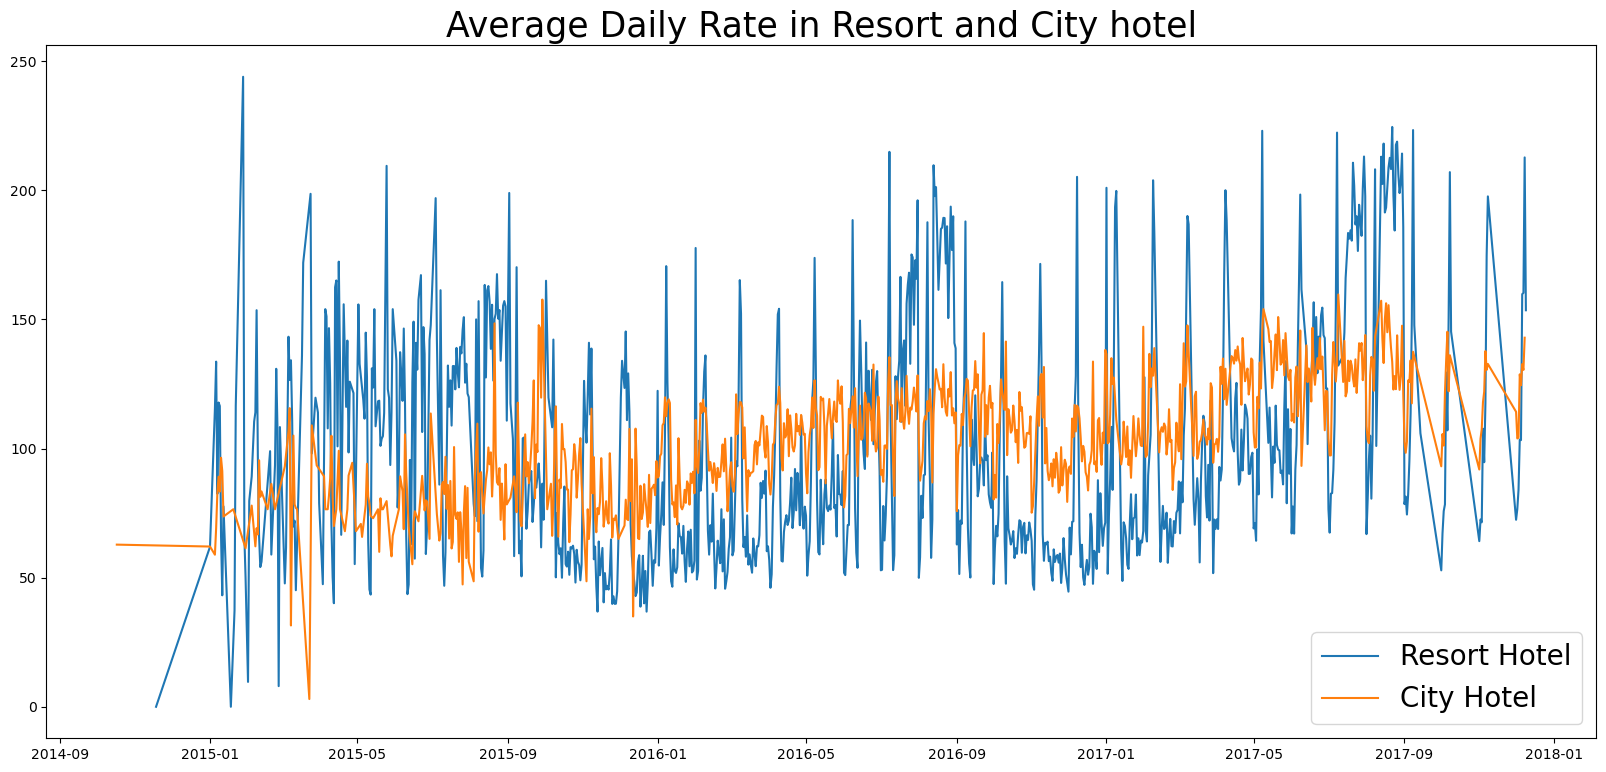

In [11]:
plt.figure(figsize = (20,9))
plt.title('Average Daily Rate in Resort and City hotel', fontsize = 25)
plt.plot(resort_hotel_cancel.index, resort_hotel_cancel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel_cancel.index, city_hotel_cancel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

In [120]:
hotel_booking_df[hotel_booking_df['is_canceled'] ==1].groupby(by = 'month').sum()[['adr']].reset_index()

,month,adr
0,1,532672.54
1,2,399455.98
2,3,419566.59
3,4,399433.20
4,5,343319.69
5,6,469422.91
6,7,388084.73
7,8,297051.25
8,9,341393.89
9,10,384930.47


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


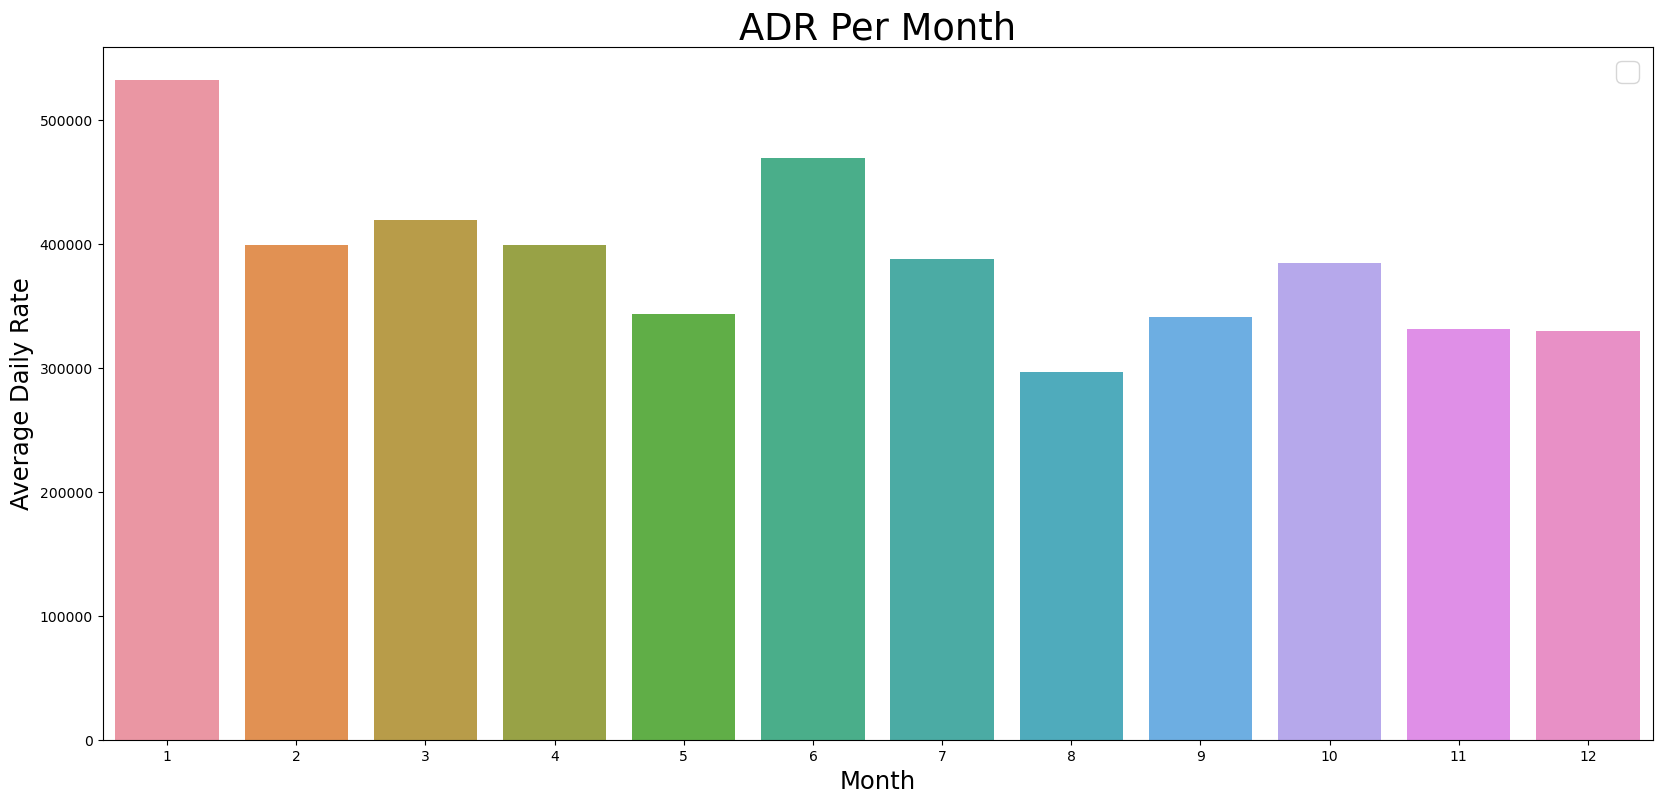

In [132]:
# Now let's check 'Average Daily Rate' for each month so that we can have further clear understanding.

plt.figure(figsize = (20,9))
plt.title('ADR Per Month', fontsize = 26.5)
sns.barplot(data = hotel_booking_df[hotel_booking_df['is_canceled'] ==1].groupby(by = 'month').sum()[['adr']].reset_index(), x = 'month', y = 'adr')
plt.xlabel('Month', fontsize = 17.5)
plt.ylabel('Average Daily Rate', fontsize = 17.5) 
plt.legend(fontsize = 20)
plt.show()

In [127]:
# This proves us that when the prices were higher in the month of 'January', the 'Cancellation Rates' skyrocketed and when the
# The prices declined in the month of 'August' the 'Cancellation rates' also reduced significantly.

# This shows us that when the prices are 'High' [Cancellation Rates Spikes], and when they are 'Low' [Cancellation Rates decreases].

In [9]:
# Let's further dive deep and check 'Cancellation Rates' according to the countries.
# And since we have around '177' Countries, we will only filter out 'Top 20' Countries.

cancelled_data = hotel_booking_df[hotel_booking_df['is_canceled'] ==1]

top_10_countries = cancelled_data['country'].value_counts()[:10]

In [10]:
top_10_countries

PRT    27519
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

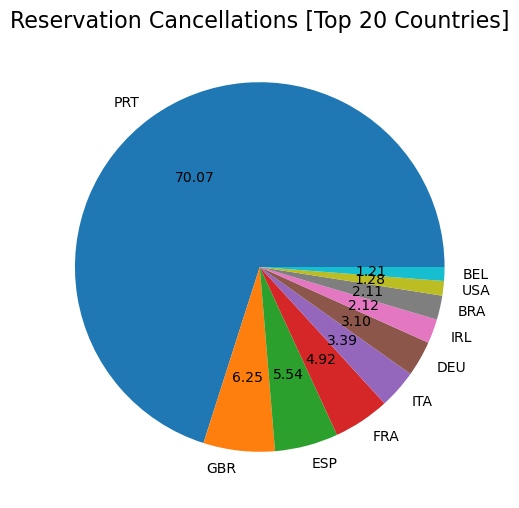

In [14]:
plt.figure(figsize = (6,6))
plt.title('Reservation Cancellations [Top 20 Countries]', fontsize = 16)
plt.pie(top_10_countries, autopct = '%.2f', labels = top_10_countries.index)
plt.show()

In [4]:
# Let's also check from where the clients are coming, whether they are coming from Online Websites, Travel Agents, etc.

hotel_booking_df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [15]:
hotel_booking_df['market_segment'].value_counts(normalize = True)*100

Online TA        47.304632
Offline TA/TO    20.285619
Groups           16.593517
Direct           10.558673
Corporate         4.435045
Complementary     0.622330
Aviation          0.198509
Undefined         0.001675
Name: market_segment, dtype: float64

In [ ]:
# Market segments with their Bookings

In [9]:
# Also if we check like from which market segments most of the cancellations are happening?

cancelled_data['market_segment'].value_counts(normalize = True)*100

Online TA        46.895351
Groups           27.353925
Offline TA/TO    18.792963
Direct            4.373191
Corporate         2.243126
Complementary     0.219338
Aviation          0.117583
Undefined         0.004522
Name: market_segment, dtype: float64

In [ ]:
Market Segments with their Cancellation Percentages

In [ ]:
# We can observe, most of clients are coming from 'Online Travel Agents', and the second most are coming either from 
# 'Offline Travel Agents' / 'Offline Tour Operators'.

# Also most of the cancellations are from 'Online Travel Agents' and 'Groups', around 20% cancellations are happening from 
# 'Offline Travel Agents'.

# The biggest conclusion is that percent of bookings performed from the customers are more than or equal to the percentage 
# of bookings cancelled by the customers themselves.

In [63]:

cancelled_data = hotel_booking_df[hotel_booking_df['is_canceled'] == 1]

In [64]:
cancellation_adr = cancelled_data.groupby(by = 'reservation_status_date')[['adr']].mean()
cancellation_adr.reset_index(inplace = True)
cancellation_adr.sort_values('reservation_status_date', inplace = True)

In [65]:
cancellation_adr

,reservation_status_date,adr
0,2014-10-17,62.800000
1,2014-11-18,0.000000
2,2015-01-01,62.062779
3,2015-01-05,96.542222
4,2015-01-06,103.926154
...,...,...
897,2017-12-04,148.121613
898,2017-12-05,118.205000
899,2017-12-06,178.939535
900,2017-12-07,173.704444


In [66]:
not_cancelled_data = hotel_booking_df[hotel_booking_df['is_canceled'] == 0]
not_cancelled_adr = not_cancelled_data.groupby(by = 'reservation_status_date')[['adr']].mean()
not_cancelled_adr.reset_index(inplace = True)
not_cancelled_adr.sort_values('reservation_status_date', inplace = True)


In [67]:
not_cancelled_adr

,reservation_status_date,adr
0,2015-01-07,31.650000
1,2015-01-08,138.444565
2,2015-01-09,110.008657
3,2015-01-10,86.723818
4,2015-01-11,59.431300
...,...,...
800,2017-12-05,113.367857
801,2017-12-06,127.924490
802,2017-12-07,130.153945
803,2017-12-08,161.916864


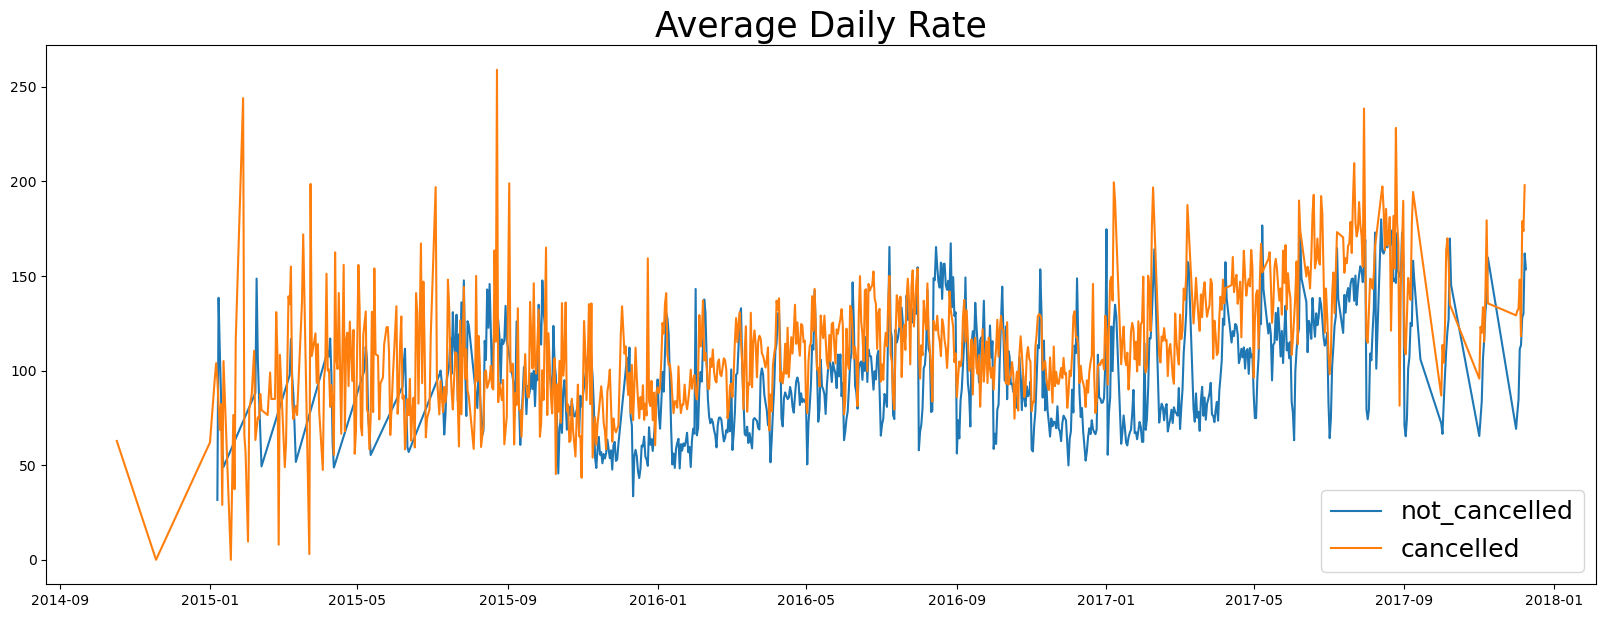

In [68]:
plt.figure(figsize = (20,7))
plt.title('Average Daily Rate', fontsize = 25)
plt.plot(not_cancelled_adr['reservation_status_date'], not_cancelled_adr['adr'], label = 'not_cancelled')
plt.plot(cancellation_adr['reservation_status_date'], cancellation_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 18)
plt.show()

In [ ]:
# We can observe above that there are lot of inconsistensies in the chart before 'September-2015' and after 'November-2017'.
# To tackle this we need to filter our data.

In [ ]:
# We further filtered out the data so that all the inconsistencies can be ignored.

In [57]:
cancellation_adr = cancellation_adr[(cancellation_adr['reservation_status_date'] > '2015-11') & (cancellation_adr['reservation_status_date'] < '2017-07')]
not_cancelled_adr = not_cancelled_adr[(not_cancelled_adr['reservation_status_date'] > '2015-11') & (not_cancelled_adr['reservation_status_date'] < '2017-07')]

In [58]:
cancellation_adr

,reservation_status_date,adr
239,2015-11-02,126.213333
240,2015-11-03,110.700000
241,2015-11-04,84.390000
242,2015-11-05,102.986000
243,2015-11-06,135.143846
...,...,...
812,2017-06-26,183.206757
813,2017-06-27,152.777317
814,2017-06-28,119.932951
815,2017-06-29,143.371724


In [59]:
not_cancelled_adr

,reservation_status_date,adr
135,2015-11-07,118.044848
136,2015-11-08,106.152133
137,2015-11-09,96.512463
138,2015-11-10,80.918947
139,2015-11-11,53.978065
...,...,...
708,2017-06-26,127.167564
709,2017-06-27,117.828235
710,2017-06-28,113.188585
711,2017-06-29,115.683448


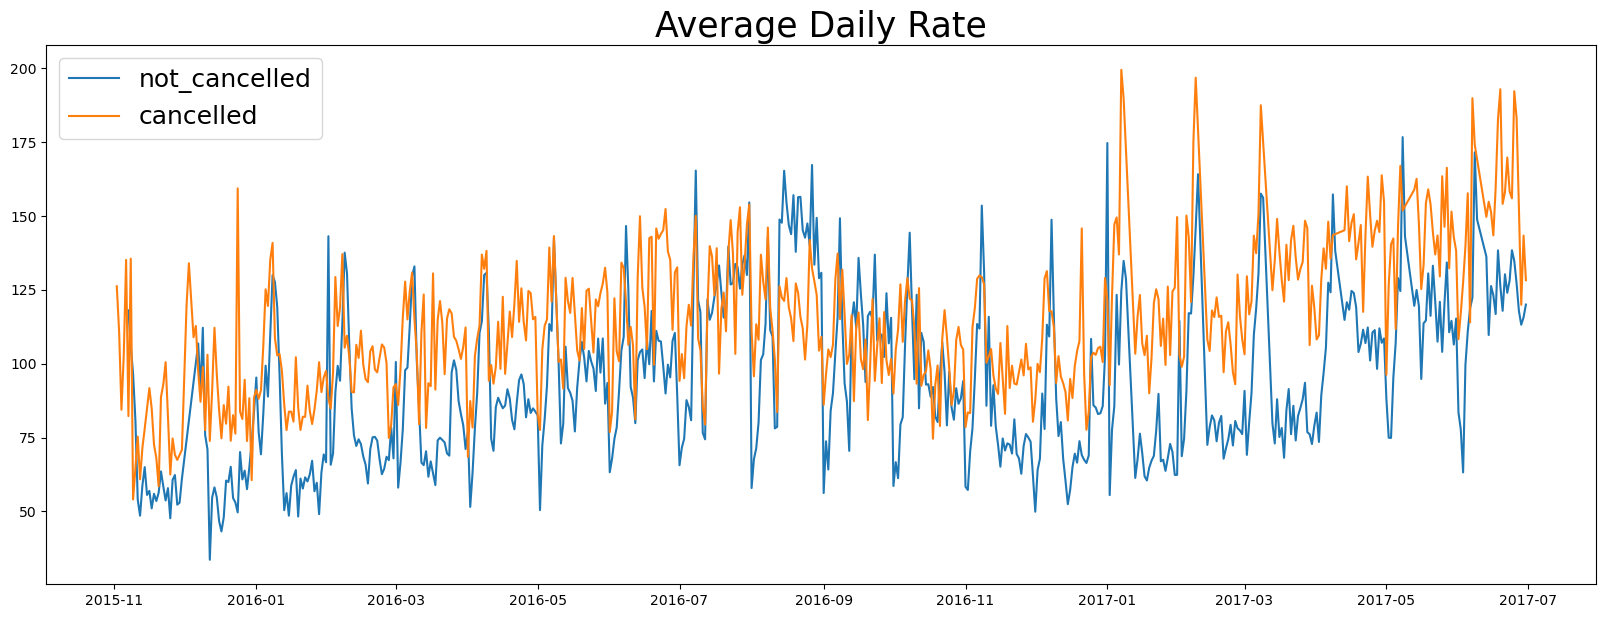

In [61]:
plt.figure(figsize = (20,7))
plt.title('Average Daily Rate', fontsize = 25)
plt.plot(not_cancelled_adr['reservation_status_date'], not_cancelled_adr['adr'], label = 'not_cancelled')
plt.plot(cancellation_adr['reservation_status_date'], cancellation_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 18)
plt.show()

In [ ]:
# This show us that 'Higher' prices affect the 'Cancellation Rates' and due to that customers tend to cancel their bookings.